In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

pdv.settings.backend = "python_function"


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# # 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="real/silver/fibroblast-reprogramming_treutlein.rds")
dataset

{'id': 'real/silver/fibroblast-reprogramming_treutlein',
 'cell_ids': ['1_iN1_C01',
  '1_iN1_C02',
  '1_iN1_C03',
  '1_iN1_C04',
  '1_iN1_C05',
  '1_iN1_C07',
  '1_iN1_C08',
  '1_iN1_C09',
  '1_iN1_C10',
  '1_iN1_C11',
  '1_iN1_C12',
  '1_iN1_C13',
  '1_iN1_C14',
  '1_iN1_C15',
  '1_iN1_C16',
  '1_iN1_C17',
  '1_iN1_C19',
  '1_iN1_C20',
  '1_iN1_C21',
  '1_iN1_C22',
  '1_iN1_C23',
  '1_iN1_C25',
  '1_iN1_C26',
  '1_iN1_C27',
  '1_iN1_C29',
  '1_iN1_C30',
  '1_iN1_C31',
  '1_iN1_C33',
  '1_iN1_C34',
  '1_iN1_C35',
  '1_iN1_C36',
  '1_iN1_C37',
  '1_iN1_C38',
  '1_iN1_C40',
  '1_iN1_C41',
  '1_iN1_C42',
  '1_iN1_C43',
  '1_iN1_C44',
  '1_iN1_C46',
  '1_iN1_C47',
  '1_iN1_C48',
  '1_iN1_C49',
  '1_iN1_C51',
  '1_iN1_C52',
  '1_iN1_C53',
  '1_iN1_C54',
  '1_iN1_C55',
  '1_iN1_C56',
  '1_iN1_C57',
  '1_iN1_C58',
  '1_iN1_C60',
  '1_iN1_C61',
  '1_iN1_C62',
  '1_iN1_C64',
  '1_iN1_C66',
  '1_iN1_C67',
  '1_iN1_C68',
  '1_iN1_C69',
  '1_iN1_C70',
  '1_iN1_C71',
  '1_iN1_C72',
  '1_iN1_C73',
 

In [3]:
# 2. 选择方法(method)
methods_selected = pdv.methods.ti_paga(resolution=0.5)
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月12日 12时56分46秒] INFO     backend: python_function                                                    
                        INFO     Methods {'method': {'id': 'paga', 'name': 'PAGA', 'tool_id': 'paga', 'source':    
                                 'tool', 'platform': 'Python', 'url':                                              
                                 'https://github.com/theislab/graph_abstraction', 'authors': [{'given':            
                                 'Alexander', 'family': 'Wolf', 'email': 'alex.wolf@helmholtz-muenchen.de',        
                                 'github': 'falexwolf', 'ORCID': '0000-0002-8760-7838'}, {'given': 'Fabian',       
                                 'family': 'Theis', 'email': 'fabian.theis@helmholtz-muenchen.de', 'github':       
                                 'theislab'}]}, 'wrapper': {'type': 'branch_trajectory', 'topology_inference':     
                                 'free', 'trajectory_types': ['cycle', 'linear

In [4]:
# 3. 运行方法(wrap)
cluster_list = list(dataset["grouping"])
dataset = pdv.wrap.add_prior_information(dataset, start_id="1_iN1_C01", groups_id=cluster_list) # 添加先验知识
model = pdv.wrap.infer_trajectory(dataset, methods_selected, parameters={"connectivity_cutoff":0.8}) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpwfz98r44                                                         
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {'start_id': '1_iN1_C01', 'groups_id': ['d2_induced', 'd2_induced',       
                                 'd2_induced', 'd2_intermediate', 'd2_intermediate', 'd2_induced',                 
                                 'd2_intermediate', 'd2_induced', 'd2_induced', 'd2_intermediate', 'd2_induced',   
                                 'd2_induced', 'd2_induced', 'd2_induced', 'd2_intermediate', 'd2_induced',        
                                 'd2_intermediate', 'd2_induced', 'd2_intermediate', 'd2_induced', 'd2_induced',   
                                 'MEF', 'd2_induced', 'MEF', 'MEF', 'd2_intermediate', 'd2_induced', 'd2_induced', 
                                 'd2_induced', 'd2_intermediate', 'd2_in

/home/huang/.conda/envs/pydynverse/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


[2025年01月12日 12时56分50秒] INFO     Methods executing finished, model: {'id':                                   
                                       '20250112_125650__data_wrapper__F5Zit0NVFI', 'cell_ids': ['1_iN1_C01',      
                                       '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05', '1_iN1_C07',            
                                       '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', '1_iN1_C11', '1_iN1_C12',            
                                       '1_iN1_C13', '1_iN1_C14', '1_iN1_C15', '1_iN1_C16', '1_iN1_C17',            
                                       '1_iN1_C19', '1_iN1_C20', '1_iN1_C21', '1_iN1_C22', '1_iN1_C23',            
                                       '1_iN1_C25', '1_iN1_C26', '1_iN1_C27', '1_iN1_C29', '1_iN1_C30',            
                                       '1_iN1_C31', '1_iN1_C33', '1_iN1_C34', '1_iN1_C35', '1_iN1_C36',            
                                       '1_iN1_C37', '1_iN1_C38', '1_iN1_C40', 

/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/methods/function/ti_paga_function.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  branches["length"] = adata.obs[[cluster_key, "dpt_pseudotime"]].groupby(cluster_key).apply(lambda x: x["dpt_pseudotime"].max() - x["dpt_pseudotime"].min()+epsilon).reset_index()[0]


[2025年01月12日 12时56分51秒] INFO     Coloring by grouping                                                        
                        DEBUG    selecting waypoints                                                               
                        DEBUG    selecting waypoints shape is (146, 355), finished!                                
                        INFO     Result plotting finished                                                          


/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/wrap/calculate_geodesic_distances.py:208: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  shortest_paths = gr.shortest_paths(source=waypoint_ids, target=cell_ids, weights="length", mode=mode)
/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/wrap/wrap_add_waypoints.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.assign(
/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/plot/project_waypoints.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping co

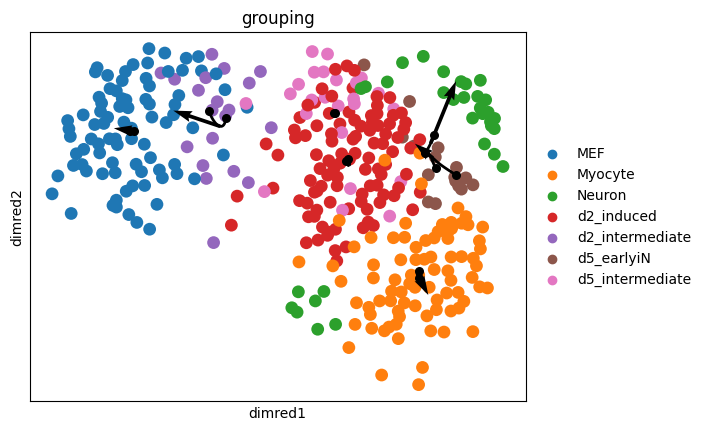

In [5]:
# 4. 绘制轨迹(dimred+plot)
model = pdv.wrap.add_dimred(model, pdv.dimred.dimred_mds, expression_source=dataset["expression"])  # 提取降维结果
pdv.plot.plot_dimred(model, grouping=cluster_list)
logger.info("Result plotting finished")